# IF3270 Machine Learning | Praktikum

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.

Group Number: 46

Group Members:
- Kharris Khisunica (13522051)
- Fabian Radenta Bangun (13522105)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from pathlib import Path



# Import other libraries if needed

## Import Dataset

In [25]:
# Write your code here
train_csv = "./praktikum-2-if-3270-ml/train.csv"
test_csv = "./praktikum-2-if-3270-ml/test.csv"
train_img = "./praktikum-2-if-3270-ml/images/images/train"
test_img =  "./praktikum-2-if-3270-ml/images/images/test"

df_train = pd.read_csv(train_csv)
df_test = pd.read_csv(test_csv)
df_train['filepath'] = df_train['Image'].apply(lambda x: str(Path(train_img) / f"{x}"))
#df_test['filepath'] = df_test['Image'].apply(lambda x: str(Path(test_img) / f"{x}"))



# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis. Provide at least 3 analysis

In [22]:
df_train.head()

,Image,Species_Label,filepath
0,eceecd68-aae4-41b5-86fe-5a0b954b038e.jpg,0,praktikum-2-if-3270-ml\images\images\train\ece...
1,224f5a7b-e6ad-479d-a6ae-a26812e4e038.jpg,0,praktikum-2-if-3270-ml\images\images\train\224...
2,461e8e5f-8221-441c-971a-aecfcaf05564.jpg,0,praktikum-2-if-3270-ml\images\images\train\461...
3,a62fab23-6107-46e5-aae0-7ff9bc0a2363.jpg,1,praktikum-2-if-3270-ml\images\images\train\a62...
4,7e27f920-cecd-4d86-9e2a-9a667b14d787.jpg,1,praktikum-2-if-3270-ml\images\images\train\7e2...


### Data Size

In [9]:
df_train.shape

(12500, 2)

### Data Types

In [10]:
df_train.dtypes

Image            object
Species_Label     int64
dtype: object

### Unique values for Categorical

In [12]:
df_train.nunique()

Image            12500
Species_Label        2
dtype: int64

### Missing Values

In [14]:
df_train.isnull().sum()

Image            0
Species_Label    0
dtype: int64

### Distribution of Category

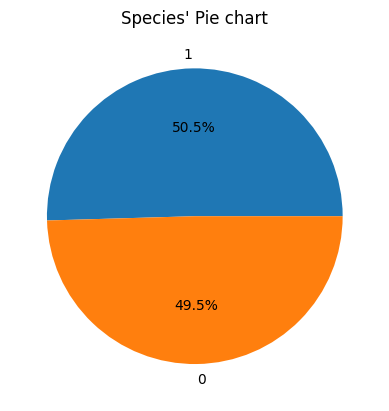

In [18]:
# Histogram for Numerical


value_counts = df_train["Species_Label"].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title(f"Species' Pie chart")
plt.show()

### Image Properties

             width      height
count  1250.000000  1250.00000
mean    404.184800   358.28320
std     110.254275    93.04556
min      59.000000    49.00000
25%     325.000000   308.50000
50%     449.000000   374.00000
75%     499.000000   406.00000
max     500.000000   500.00000
mode
RGB    1250
Name: count, dtype: int64


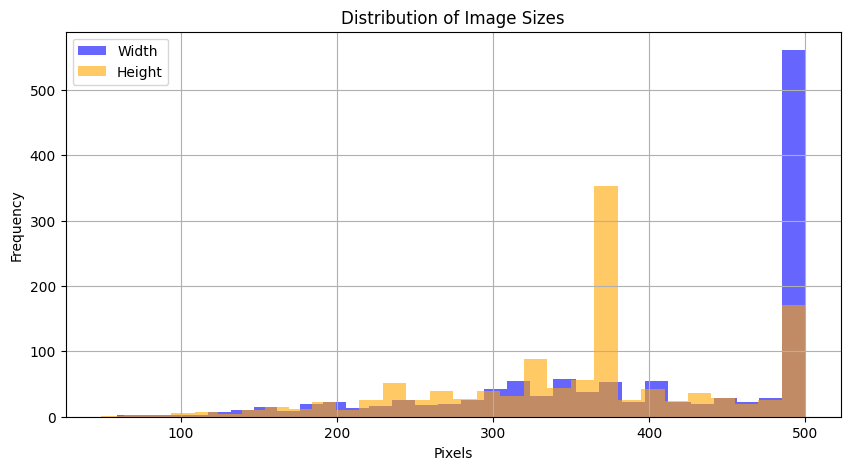

In [ ]:
sample_df = df_train.sample(1250, random_state = 42)

image_shapes = []
for path in sample_df['filepath']:
    with Image.open(path) as img:
        image_shapes.append(img.size + (img.mode,))

shape_df = pd.DataFrame(image_shapes, columns=['width', 'height', 'mode'])

# Summary of dimensions
print(shape_df[['width', 'height']].describe())

# Color mode check
print(shape_df['mode'].value_counts())

plt.figure(figsize=(10, 5))
plt.hist(shape_df['width'], bins=30, alpha=0.6, color='blue', label='Width')
plt.hist(shape_df['height'], bins=30, alpha=0.6, color='orange', label='Height')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.title("Distribution of Image Sizes")
plt.legend()
plt.grid(True)
plt.show()


### QUESTION

1. What is the largest and smallest image size for each category ?

Smallest image per category:
   label  width  height
0    0.0    150     112
1    1.0    147     143
Largest image per category:
   label  width  height
0    0.0    499     500
1    1.0    500     498


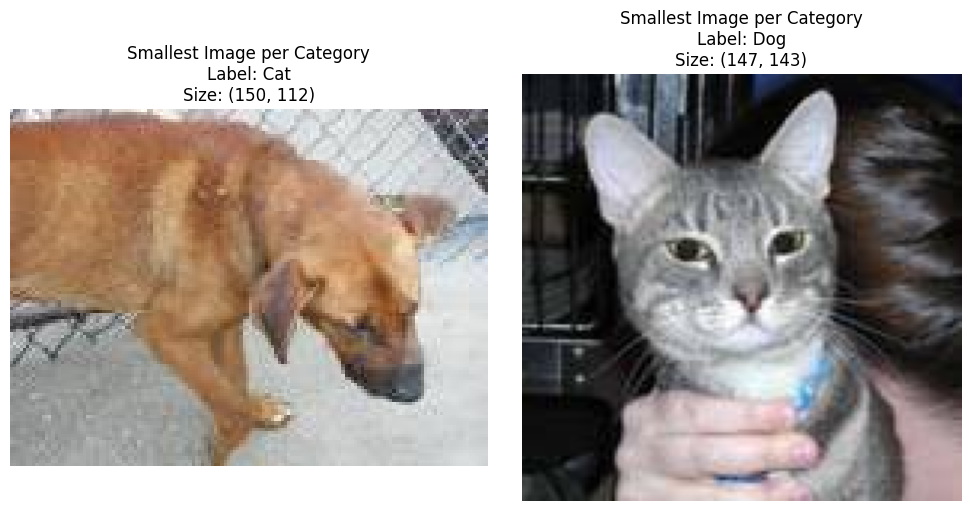

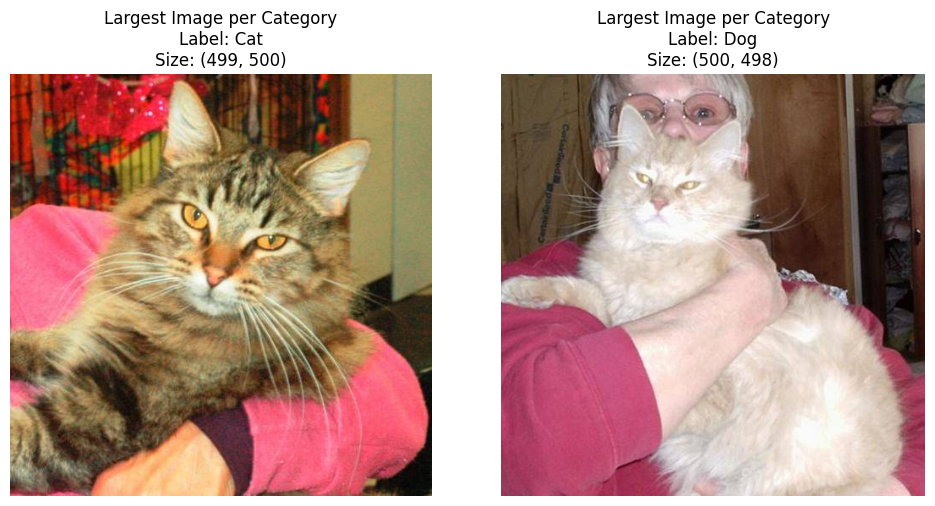

In [37]:
shape_df['pixels'] = shape_df['width'] * shape_df['height']

smallest = shape_df.loc[shape_df.groupby('label')['pixels'].idxmin()].reset_index(drop=True)
largest = shape_df.loc[shape_df.groupby('label')['pixels'].idxmax()].reset_index(drop=True)


def show_images(df, title):
    plt.figure(figsize=(10, 5))
    for i, row in enumerate(df.itertuples()):
        img = Image.open(row.filepath)
        plt.subplot(1, 2, i + 1)
        plt.imshow(img)
        label_str = "Cat" if row.label == 0 else "Dog"
        plt.title(f"{title}\nLabel: {label_str}\nSize: {img.size}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 4. Print info and show images
print("Smallest image per category:")
print(smallest[['label', 'width', 'height']])

print("Largest image per category:")
print(largest[['label', 'width', 'height']])

show_images(smallest, "Smallest Image per Category")
show_images(largest, "Largest Image per Category")


2. What is the distribution of Height and Width of the image in this dataset

Image Size Summary:
             width      height
count  1250.000000  1250.00000
mean    404.184800   358.28320
std     110.254275    93.04556
min      59.000000    49.00000
25%     325.000000   308.50000
50%     449.000000   374.00000
75%     499.000000   406.00000
max     500.000000   500.00000


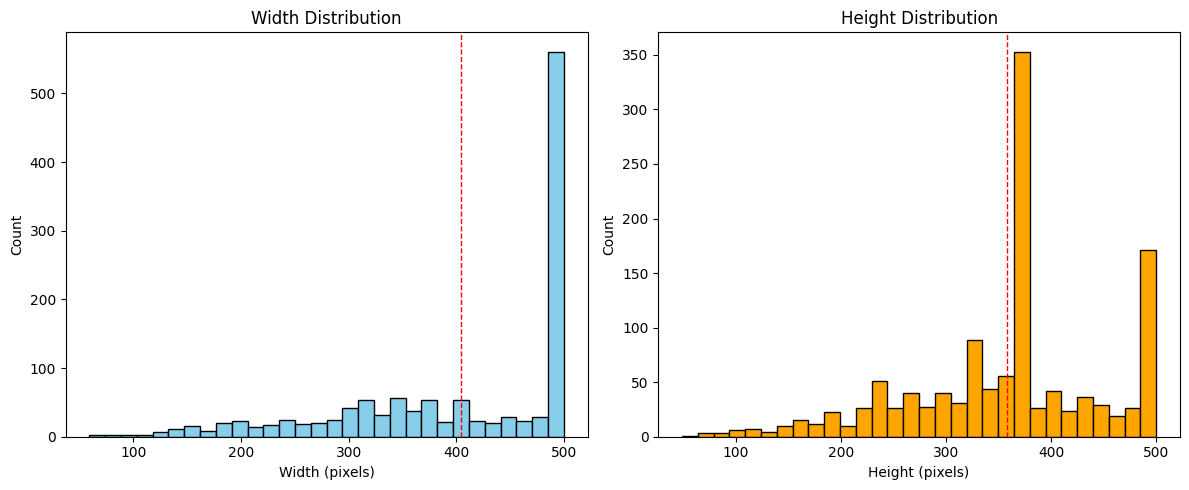

In [39]:
print("Image Size Summary:")
print(shape_df[['width', 'height']].describe())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(shape_df['width'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(shape_df['width'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(shape_df['height'], bins=30, color='orange', edgecolor='black')
plt.axvline(shape_df['height'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 2. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `Train_processed.csv` given by the TA. The `test_processed_no_solution.csv` data is only used for kaggle submission.

In [ ]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

from sklearn.model_selection import train_test_split


split_df = df_train.copy()

X = split_df.drop(columns=["Segmentation"])
y = split_df["Segmentation"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

### Data Imputation for Missing Values  

Imputing missing values is essential to ensure cleaner data. Additionally, missing values can affect the performance of the model used in machine learning.  

For missing values in categorical data (Ever_Married, Graduated, Profession, Var_1), Mode Imputation will be used. This method is the simplest and fastest. Moreover, since the number of missing values is relatively small compared to the dataset (around 1% of the total data in a column), there will be no significant impact that could cause an overrepresentation of the mode variable.  

For missing values in numerical data (Work Experience and Family Size), the median will be used for imputation. Since Work Experience and Family Size have integer attribute domains, they can be imputed using either the mean or median. Additionally, due to the relatively large number of missing values, imputing with a representative value for the entire column is preferable over using a constant value or mode.

In [ ]:
class FeatureImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.modes = None
        self.impute_values = None

    def fit(self, x):
        self.modes = x.select_dtypes(include=["object"]).mode().iloc[0]

        self.impute_values = {}
        for num_col in x.select_dtypes(include=["number"]).columns:
            skewness = skew(x[num_col].dropna())
            if abs(skewness) > 0.5:
                self.impute_values[num_col] = round(x[num_col].median())
            else:
                self.impute_values[num_col] = round(x[num_col].mean())

        return self

    def transform(self, x):
        x = x.copy()
        for cat_col, mode_value in self.modes.items():
            x[cat_col].fillna(mode_value, inplace=True)

        for num_col, value in self.impute_values.items():
            x[num_col].fillna(value, inplace=True)

        return x

In [ ]:
class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, iqr_factor=1.5, lower_percentile=0.01, upper_percentile=0.99):
        self.cols = cols
        self.iqr_factor = iqr_factor
        self.lower_percentile = lower_percentile
        self.upper_percentile = upper_percentile
        self.lower_bounds = {}
        self.upper_bounds = {}

    def fit(self, X, y=None):
        X_numeric = X[self.cols].apply(pd.to_numeric, errors='coerce')

        Q1 = X_numeric.quantile(0.25)
        Q3 = X_numeric.quantile(0.75)
        IQR = Q3 - Q1

        self.lower_bounds = (Q1 - self.iqr_factor * IQR).to_dict()
        self.upper_bounds = (Q3 + self.iqr_factor * IQR).to_dict()


        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.cols:
            if col not in X_copy:
                continue

            mask = (X_copy[col] < self.lower_bounds[col]) | (X_copy[col] > self.upper_bounds[col])

        return X_copy


### Encoder for Categorical Data

It's important to encode our categorical data because the models used in this project require numerical data as input. Since categorical data is present in the dataset for this project, it's essential to encode it so we can use it to build our model. An encoder is used to transform categorical data into meaningful numerical data, allowing it to be represented in numerical form.

In [ ]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = {}

    def fit(self, x):
        categorical_cols = x.select_dtypes(include=["object"]).columns
        for cat_col in categorical_cols:
            le = LabelEncoder()
            x[cat_col] = x[cat_col].astype(str)
            le.fit(x[cat_col])
            self.encoders[cat_col] = le
        return self

    def transform(self, x):
        x = x.copy()
        for e_col, le in self.encoders.items():
            x[e_col] = x[e_col].astype(str).map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
        return x

### Scaler for Numerical Data

Feature scaling is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

In [ ]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.scaler_ = MinMaxScaler()

        self.scaler_.fit(X)

        return self

    def transform(self, X):
        X_scaled = self.scaler_.transform(X)

        return X_scaled

# Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

num_cols = [column for column in numerical_train_data]

pipe = Pipeline([
    ("imputer", FeatureImputer()),
    ("outlier_handling", OutlierHandler(cols=num_cols)),
    ("encoder", FeatureEncoder()),
    ("scaler", FeatureScaler())
])

In [ ]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

X_train_processed = pipe.fit_transform(X_train)
X_val_processed = pipe.transform(X_val)

# X_train_processed dan X_val_processed adalah numpy array, ubah ke df
X_train_processed = pd.DataFrame(X_train_processed, columns=X_train.columns)
X_val_processed = pd.DataFrame(X_val_processed, columns=X_val.columns)

X_train_processed.isnull().sum()


<ipython-input-19-731d8f7434f7>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[cat_col].fillna(mode_value, inplace=True)
<ipython-input-19-731d8f7434f7>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


In [ ]:
X_train_processed

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.312716,1.0,1.0,0.306667,1.0,0.000,0.071429,0.0,0.125,0.000000
1,0.681833,0.0,0.0,0.360000,0.0,0.125,0.285714,1.0,0.625,1.000000
2,0.262321,1.0,1.0,0.133333,1.0,0.000,0.428571,0.0,0.125,0.000000
3,0.125375,1.0,1.0,0.160000,1.0,0.250,0.642857,0.0,0.125,0.333333
4,0.267994,0.0,0.0,0.066667,0.0,0.250,0.000000,1.0,0.500,0.833333
...,...,...,...,...,...,...,...,...,...,...
4512,0.080432,0.0,1.0,0.306667,1.0,0.250,0.071429,0.0,0.000,0.833333
4513,0.022583,1.0,0.0,0.146667,0.0,0.625,0.071429,1.0,0.250,0.333333
4514,0.383246,1.0,1.0,0.346667,1.0,0.500,0.071429,0.5,0.250,0.833333
4515,0.091000,1.0,0.0,0.306667,1.0,0.125,0.285714,1.0,0.250,0.833333


# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the probability for each class in the `Segmentation` feature. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

In this task, you are required to predict each class in the Segmentation feature using Ensemble Learning algorithms.

## 4.1 Ensemble

Implement **at least 1 model** for each of the following learning algorithms:

- Bagging
- Boosting
- Stacking
- Voting

### 4.1.1 Bagging
Bagging is a technique that trains a single type of model, with each model being trained on a different subset of the data. The final prediction is determined by the most frequently occurring prediction across all models. As a reference, you may use `RandomForestClassifier` to build your bagging model.

In [ ]:
# Type your code here

# copying splitted dataset
rf_X_train = X_train_processed.copy()
rf_y_train = y_train.copy()
rf_X_val = X_val_processed.copy()
rf_y_val = y_val.copy()

# train model
rf_model = RandomForestClassifier(
    n_estimators=97,
    max_depth=8,
    random_state=42
)

rf_model.fit(rf_X_train, rf_y_train)

#akurasi
rf_y_pred = rf_model.predict(rf_X_val)

rf_accuracy = accuracy_score(rf_y_val, rf_y_pred)
print(f"accuracy: {rf_accuracy}")

accuracy: 0.5203539823008849


### 4.1.2 Boosting
Boosting is a technique where the first model is trained on entire dataset, the second model to reduce the error of first model, followed by a third model to reduce the error of the second model, and so on. As a reference, you may use `GradientBoostingClassifier` to build your boosting model.

In [ ]:
# Type your code here

# copying splitted dataset
adaboost_X_train = X_train_processed.copy()
adaboost_y_train = y_train.copy()
adaboost_X_val = X_val_processed.copy()
adaboost_y_val = y_val.copy()

# train model
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=246,
    learning_rate=0.1,
    random_state=42
)

adaboost_model.fit(adaboost_X_train, adaboost_y_train)

#akurasi
adaboost_y_pred = adaboost_model.predict(adaboost_X_val)

adaboost_accuracy = accuracy_score(adaboost_y_val, adaboost_y_pred)
print(f"accuracy: {adaboost_accuracy}")

accuracy: 0.5008849557522124


### 4.1.3 Voting
Voting is a technique that trains multiple different models, with each model being trained on the entire dataset. The final prediction is obtained through voting. As a reference, you may use `VotingClassifier` to build your voting model.

In [ ]:
# Type your code here

### 4.1.4 Stacking
Stacking is a technique that trains multiple different models, with each model being trained on the entire dataset. The final prediction is obtained through a meta-learner model that takes the predictions of the previous models as input. As a reference, you may use `StackingClassifier` to build your stacking model.

In [ ]:
# Type your code here

Note: You can use/add other classifiers that haven't been mentioned, as long as it belong to one of the ensemble methods mentioned above.

## 4.2 Validation

Validation is the process of evaluating a trained model using a validation set or cross-validation method. It provides metrics that help determine the necessary steps for the next iteration of model development.  

For validation, the metric used is **log loss**, which measures the model's performance in terms of probabilistic predictions. A lower log loss indicates better model calibration.  

### Required Validation Results  
The validation results that must be included in the notebook are:  
1. The validation results from the required baseline models.  
2. The validation results from the final submission model on **Kaggle**.  

In [ ]:
# Type your code here

rf_model.fit(X_train_processed, y_train)

y_val_pred = rf_model.predict(X_val_processed)

macro_f1 = f1_score(y_val, y_val_pred, average="macro")
print(f"Macro F1 Score on Validation Set: {macro_f1:.4f}")



Macro F1 Score on Validation Set: 0.5008


In [ ]:
# Type your code here

df_test_pipelined = pipe.transform(df_test)
df_test_pipelined = pd.DataFrame(df_test_pipelined, columns=X_train.columns)

y_pred = rf_model.predict(df_test_pipelined)

submission = pd.DataFrame({
    'ID': df_test.index,
    'Segmentation': y_pred
})

<ipython-input-19-731d8f7434f7>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[cat_col].fillna(mode_value, inplace=True)
<ipython-input-19-731d8f7434f7>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

## Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `ID`, `Segmentation` column.

In [ ]:
submission.to_csv('submission.csv', index=False)
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

1. Which segments (A, B, C, D) have the highest and lowest misclassification rates?
2. Are there any specific segments where the model struggles to make correct predictions?
3. Which features contribute the most to incorrect predictions?
4. Which ensemble technique (Bagging, Boosting, Stacking, Voting) produces the lowest log loss?
5. Are there significant differences in error distribution between different ensemble models?
6. Does a particular model consistently misclassify certain segments more than others?
7. etc..

4. For our case, the best ensemble technique that produces the best prediction is Bagging with Random Forest Algorithm.



`Provide your analysis here`